In [2]:
# import the basic libraries and graphic setting 
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style='whitegrid')

# don't show warning message 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# dataset loading 
df = pd.read_csv('data/rawdata_sep_sample.csv')
print(df.shape)

(41659, 160)


In [4]:
df.head()

,binding_time,equip_no,equip_date,equip_time,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,W_Desulfur,W_CO,W_Backflow,W_P301_F_Cnt,S_Level_Con,S_Desulfur,S_CO,S_Backflow,S_P301_F_Cnt,S_P203OL
0,20190901010002,10965,2019-09-01,0:58:19,0,2,723,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,False
1,20190901010103,10965,2019-09-01,0:59:20,0,2,724,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,False
2,20190901010204,10965,2019-09-01,1:00:21,0,2,724,59.3,4990,110.0,...,False,False,False,False,False,False,False,False,False,False
3,20190901010305,10965,2019-09-01,1:01:23,0,2,723,59.3,4990,110.1,...,False,False,False,False,False,False,False,False,False,False
4,20190901010401,10965,2019-09-01,1:02:19,0,2,724,59.3,4990,109.8,...,False,False,False,False,False,False,False,False,False,False


In [5]:
## equip_date, equip_time을 날짜와 시간 타입으로 변경 
import datetime as datetime
df['equip_dt'] = df['equip_date'] + ' ' + df['equip_time']
df['equip_dt'] = pd.to_datetime(df['equip_dt'])
df.head()

,binding_time,equip_no,equip_date,equip_time,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,W_CO,W_Backflow,W_P301_F_Cnt,S_Level_Con,S_Desulfur,S_CO,S_Backflow,S_P301_F_Cnt,S_P203OL,equip_dt
0,20190901010002,10965,2019-09-01,0:58:19,0,2,723,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,2019-09-01 00:58:19
1,20190901010103,10965,2019-09-01,0:59:20,0,2,724,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,2019-09-01 00:59:20
2,20190901010204,10965,2019-09-01,1:00:21,0,2,724,59.3,4990,110.0,...,False,False,False,False,False,False,False,False,False,2019-09-01 01:00:21
3,20190901010305,10965,2019-09-01,1:01:23,0,2,723,59.3,4990,110.1,...,False,False,False,False,False,False,False,False,False,2019-09-01 01:01:23
4,20190901010401,10965,2019-09-01,1:02:19,0,2,724,59.3,4990,109.8,...,False,False,False,False,False,False,False,False,False,2019-09-01 01:02:19


In [6]:
# transfer date, time columns 
df['year'] = df['equip_dt'].dt.year
df['month'] = df['equip_dt'].dt.month
df['day'] = df['equip_dt'].dt.day
df['hour'] = df['equip_dt'].dt.hour
df['minute'] = df['equip_dt'].dt.minute
df['second'] = df['equip_dt'].dt.second

df.tail()

,binding_time,equip_no,equip_date,equip_time,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,S_Backflow,S_P301_F_Cnt,S_P203OL,equip_dt,year,month,day,hour,minute,second
41654,20190930225504,10965,2019-09-30,22:53:10,0,2,744,57.4,4990,110.2,...,False,False,False,2019-09-30 22:53:10,2019,9,30,22,53,10
41655,20190930225605,10965,2019-09-30,22:54:11,0,2,743,57.5,4990,110.0,...,False,False,False,2019-09-30 22:54:11,2019,9,30,22,54,11
41656,20190930225701,10965,2019-09-30,22:55:07,0,2,743,57.4,4990,110.2,...,False,False,False,2019-09-30 22:55:07,2019,9,30,22,55,7
41657,20190930225802,10965,2019-09-30,22:56:08,0,2,743,57.5,4990,110.0,...,False,False,False,2019-09-30 22:56:08,2019,9,30,22,56,8
41658,20190930225904,10965,2019-09-30,22:57:09,0,2,743,57.5,4990,110.1,...,False,False,False,2019-09-30 22:57:09,2019,9,30,22,57,9


df.describe()

<AxesSubplot:xlabel='month', ylabel='ACP'>

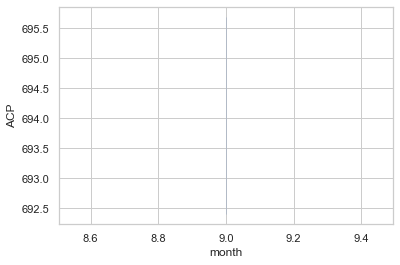

In [8]:
sns.lineplot(data=df, x= 'month', y='ACP')

In [1]:
## check the column names 
for col in df.columns : 
    print(col)

NameError: name 'df' is not defined

In [ ]:
## Define the categorical variables to ( year, month, day, hour, minute, second ) 

categorical_feature_names = ['year', 'month', 'day', 'hour', 'minute', 'second']

for var in categorical_feature_names: 
    df[var] = df[var].astype("category") 

<AxesSubplot:xlabel='day', ylabel='ACP'>

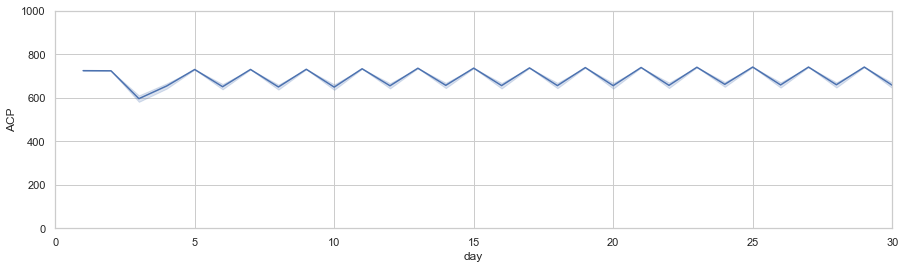

In [69]:
# charting 
plt.figure(figsize=(15,4))
plt.axis([0, 30, 0, 1000])     # X, Y축의 범위: [xmin, xmax, ymin, ymax]
sns.lineplot(data = df, x = 'day', y = 'ACP')

<AxesSubplot:xlabel='day', ylabel='TT102'>

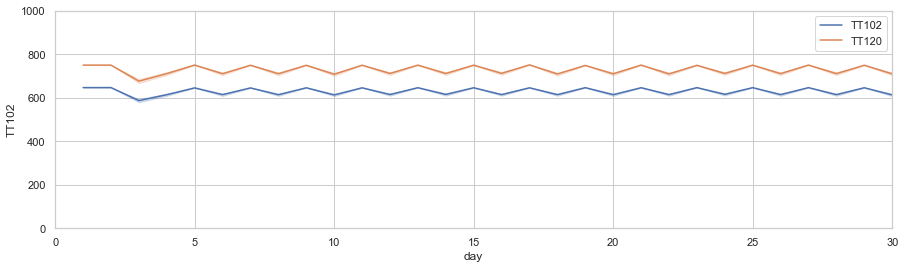

In [71]:
plt.figure(figsize=(15,4))
plt.axis([0, 30, 0, 1000])     # X, Y축의 범위: [xmin, xmax, ymin, ymax]
sns.lineplot(data = df, x = 'day', y = 'TT102', label='TT102')
sns.lineplot(data = df, x = 'day', y = 'TT120', label='TT120')

<AxesSubplot:xlabel='day', ylabel='TT109'>

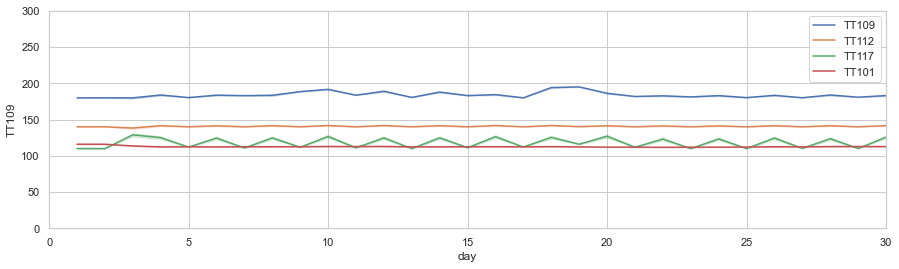

In [73]:
plt.figure(figsize=(15,4))
plt.axis([0, 30, 0, 300])     # X, Y축의 범위: [xmin, xmax, ymin, ymax]
sns.lineplot(data = df, x = 'day', y = 'TT109', label='TT109')
sns.lineplot(data = df, x = 'day', y = 'TT112', label='TT112')
sns.lineplot(data = df, x = 'day', y = 'TT117', label='TT117')
sns.lineplot(data = df, x = 'day', y = 'TT101', label='TT101')

<AxesSubplot:xlabel='day', ylabel='TT123'>

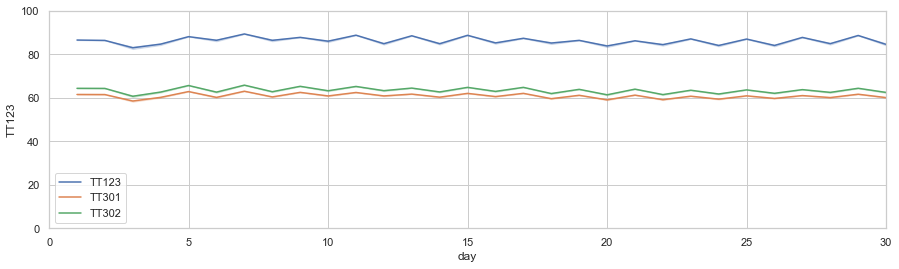

In [75]:
plt.figure(figsize=(15,4))
plt.axis([0, 30, 0, 100])     # X, Y축의 범위: [xmin, xmax, ymin, ymax]
sns.lineplot(data = df, x = 'day', y = 'TT123', label='TT123')
sns.lineplot(data = df, x = 'day', y = 'TT301', label='TT301')
sns.lineplot(data = df, x = 'day', y = 'TT302', label='TT302')

<AxesSubplot:xlabel='day', ylabel='TT Cogen'>

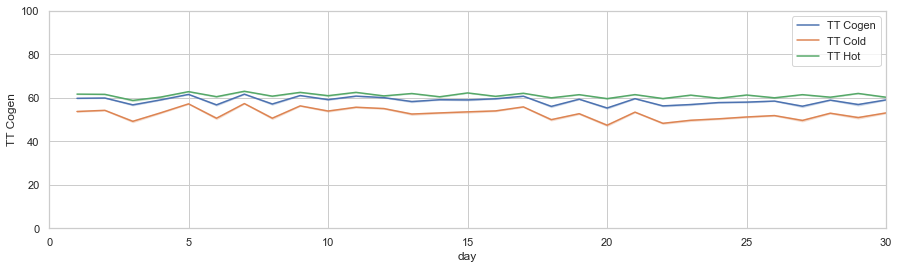

In [82]:
plt.figure(figsize=(15,4))
plt.axis([0, 30, 0, 100])     # X, Y축의 범위: [xmin, xmax, ymin, ymax]
sns.lineplot(data = df, x = 'day', y = 'TT Cogen', label='TT Cogen')
sns.lineplot(data = df, x = 'day', y = 'TT Cold', label='TT Cold')
sns.lineplot(data = df, x = 'day', y = 'TT Hot', label='TT Hot')

<AxesSubplot:xlabel='day', ylabel='PIT101'>

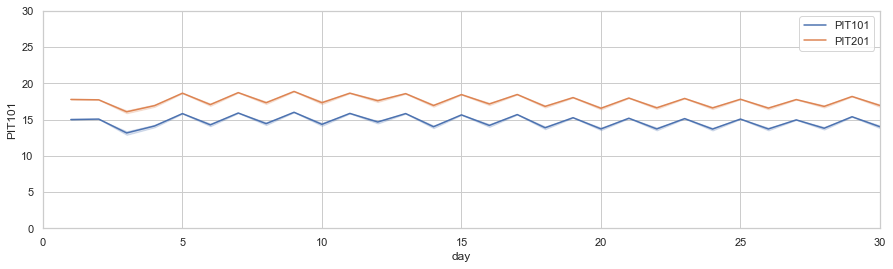

In [83]:
plt.figure(figsize=(15,4))
plt.axis([0, 30, 0, 30])     # X, Y축의 범위: [xmin, xmax, ymin, ymax]
sns.lineplot(data = df, x = 'day', y = 'PIT101', label='PIT101')
sns.lineplot(data = df, x = 'day', y = 'PIT201', label='PIT201')

<AxesSubplot:xlabel='day', ylabel='Conduct'>

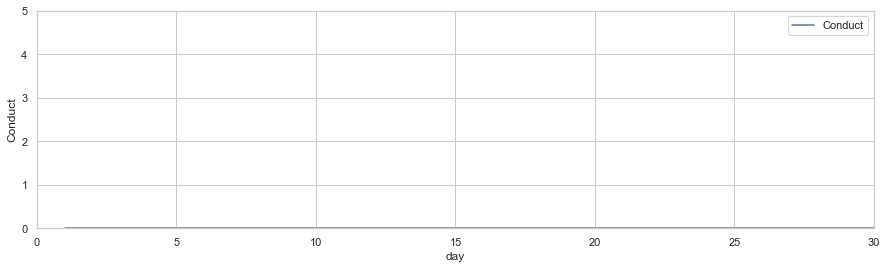

In [85]:
plt.figure(figsize=(15,4))
plt.axis([0, 30, 0, 5])     # X, Y축의 범위: [xmin, xmax, ymin, ymax]
sns.lineplot(data = df, x = 'day', y = 'Conduct', label='Conduct')

In [97]:
## (min, max, average) by month
df_day = df.groupby('day')

In [99]:
df_day['TT102'].min()

day
1     645.4
2     645.4
3     202.7
4     215.4
5     643.9
6     215.3
7     643.1
8     215.4
9     642.6
10    215.3
11    643.1
12    215.1
13    643.5
14    215.3
15    642.6
16    215.2
17    644.3
18    215.1
19    642.1
20    215.6
21    643.2
22    215.0
23    642.8
24    215.1
25    643.5
26    215.1
27    644.5
28    215.1
29    643.4
30    214.8
Name: TT102, dtype: float64

In [100]:
df_day['TT102'].max()

day
1     649.5
2     650.0
3     682.6
4     683.2
5     648.5
6     683.5
7     648.5
8     683.6
9     650.4
10    683.3
11    649.5
12    683.6
13    649.4
14    683.2
15    650.9
16    683.8
17    648.9
18    683.7
19    650.8
20    683.5
21    649.5
22    683.7
23    649.9
24    683.6
25    649.5
26    684.0
27    649.8
28    684.1
29    649.4
30    683.9
Name: TT102, dtype: float64

In [101]:
df_day['TT102'].mean()

day
1     647.160979
2     647.188849
3     587.149667
4     614.393524
5     645.806004
6     614.702835
7     645.638136
8     614.289663
9     646.177528
10    613.325448
11    646.120875
12    615.082953
13    646.633594
14    615.547727
15    646.374184
16    614.670050
17    646.168269
18    614.603720
19    646.771011
20    614.514636
21    646.568889
22    614.666740
23    646.989944
24    616.031007
25    646.860686
26    614.815827
27    646.935842
28    614.607051
29    646.382788
30    613.417723
Name: TT102, dtype: float64

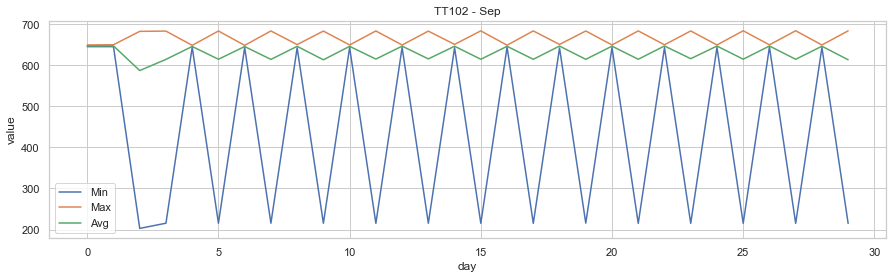

In [120]:
# min, max, average chart 
plt.figure(figsize=(15,4))

plt.plot(df_day['TT102'].min(), label = 'Min')
plt.plot(df_day['TT102'].max(), label = 'Max')
plt.plot(df_day['TT102'].mean(), label = 'Avg')

plt.title('TT102 - Sep')
plt.xlabel('day')
plt.ylabel('value')
plt.legend()